#### About The Dataset 

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Reading the data
data=pd.read_csv('Fraud.csv')

In [3]:
data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [4]:
data.tail(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [20]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [5]:
data.shape

(6362620, 11)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [13]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [14]:
data.corr()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


In [19]:
legit = len(data[data.isFraud == 0])
fraud = len(data[data.isFraud == 1])

print("No of Legit transactions: ", legit)
print("NO of Fraud transactions: ", fraud)

No of Legit transactions:  6354407
NO of Fraud transactions:  8213


In [22]:
# 1. Handling Missing Values

print("Missing values in each column:")
missing_values = data.isnull().sum()
print(missing_values)

data.fillna(0, inplace=True)

# Verify missing values are handled
print("Missing values after imputation:")
print(data.isnull().sum())

Missing values in each column:
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64
Missing values after imputation:
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [23]:
# 2. Handling Outliers

# Identify outliers using Z-score

numeric_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
z_scores = np.abs(stats.zscore(data[numeric_cols]))
print("Z-scores calculated for numeric columns")

threshold = 3

# Filter out the outliers
data_clean = data[(z_scores < 
                   threshold).all(axis=1)]
print(f"Data shape before outlier removal: {data.shape}")
print(f"Data shape after outlier removal: {data_clean.shape}")

Z-scores calculated for numeric columns
Data shape before outlier removal: (6090589, 11)
Data shape after outlier removal: (5580830, 11)


IndexError: index 3 is out of bounds for axis 1 with size 3

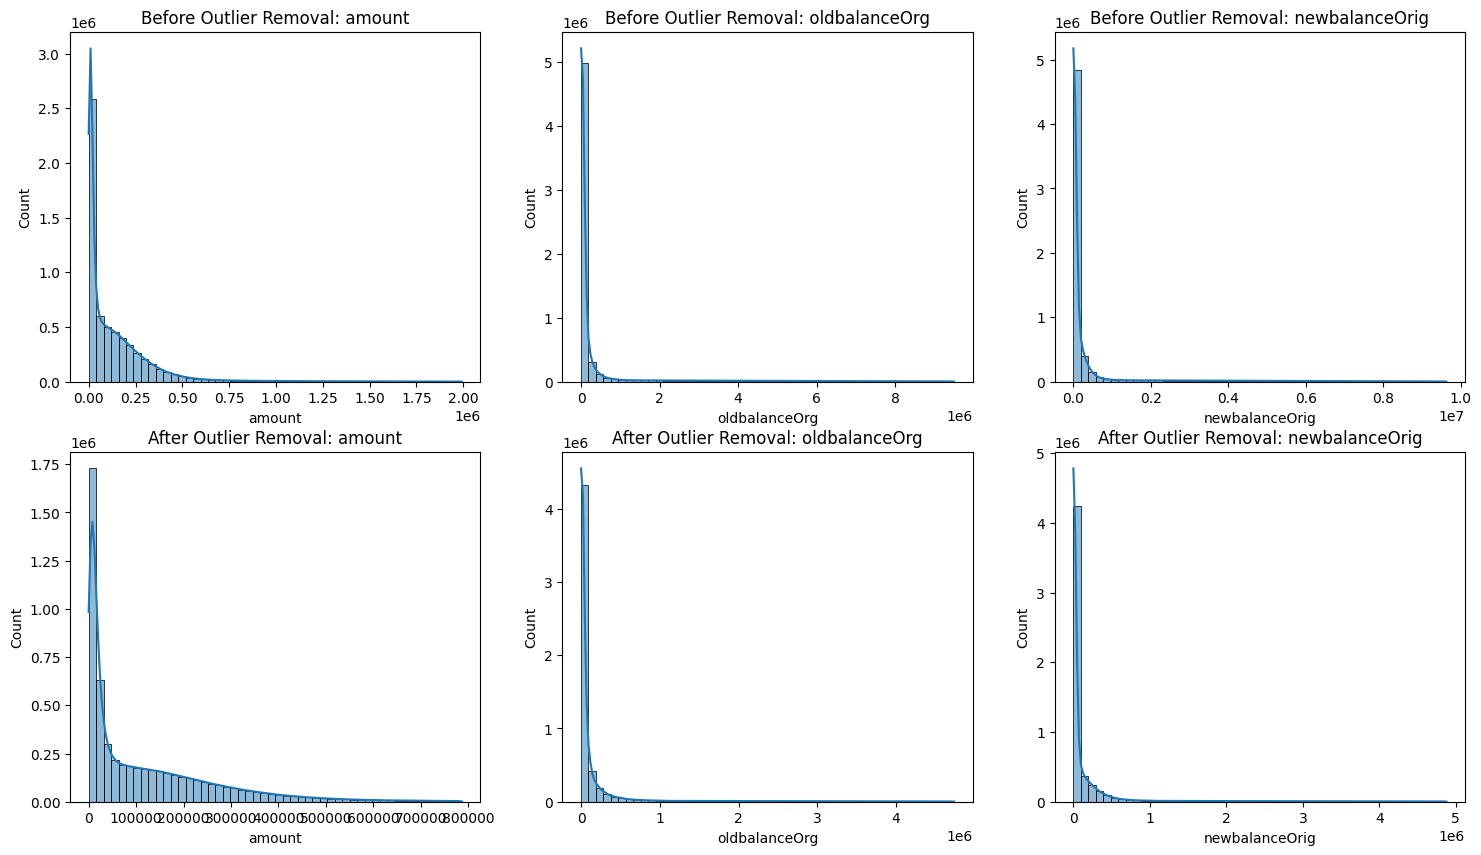

In [24]:
# Visualize the distribution of numeric columns before and after removing outliers

fig, axs = plt.subplots(2, 3, figsize=(18, 10))
for i, col in enumerate(numeric_cols):
    sns.histplot(data[col], bins=50, kde=True, ax=axs[0, i])
    axs[0, i].set_title(f'Before Outlier Removal: {col}')
    sns.histplot(data_clean[col], bins=50, kde=True, ax=axs[1, i])
    axs[1, i].set_title(f'After Outlier Removal: {col}')
plt.tight_layout()
plt.show()

Correlation matrix:
                    step    amount  oldbalanceOrg  newbalanceOrig  \
step            1.000000 -0.018119      -0.002715       -0.001748   
amount         -0.018119  1.000000       0.058429        0.084341   
oldbalanceOrg  -0.002715  0.058429       1.000000        0.991410   
newbalanceOrig -0.001748  0.084341       0.991410        1.000000   
oldbalanceDest -0.007337  0.325056       0.132658        0.139469   
newbalanceDest -0.018565  0.404694       0.078438        0.075268   
isFraud         0.025758  0.025377       0.001331       -0.009577   
isFlaggedFraud  0.000797  0.001375       0.000214        0.000190   

                oldbalanceDest  newbalanceDest   isFraud  isFlaggedFraud  
step                 -0.007337       -0.018565  0.025758        0.000797  
amount                0.325056        0.404694  0.025377        0.001375  
oldbalanceOrg         0.132658        0.078438  0.001331        0.000214  
newbalanceOrig        0.139469        0.075268 -0.009577  

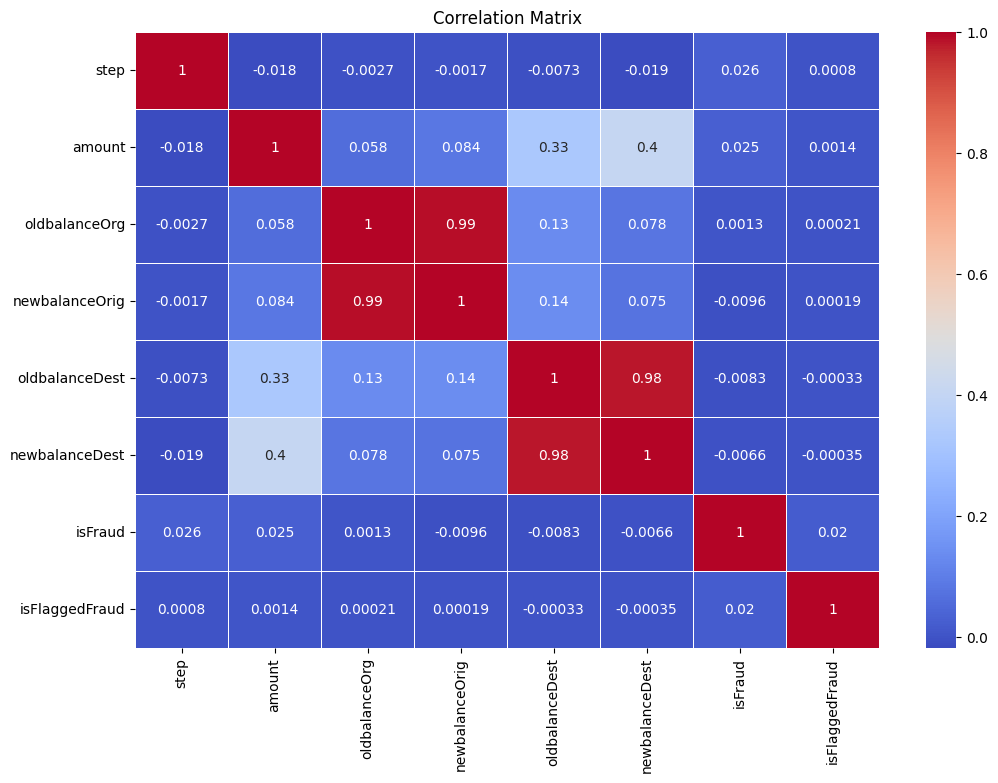

In [25]:
# 3. Handling Multicollinearity

# Calculate the correlation matrix
correlation_matrix = data_clean.corr()
print("Correlation matrix:")
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [28]:
# Drop highly correlated features (example threshold > 0.9)
def drop_highly_correlated(data, threshold=0.9):
    corr_matrix = data.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    return data.drop(columns=to_drop)

# Drop highly correlated features
data_final = drop_highly_correlated(data_clean)

# Display the final dataset after cleaning
print("Final dataset after cleaning:")
print(data_final.head())
print(f"Final dataset shape: {data_final.shape}")

# Save the cleaned dataset to a new CSV file
data_final.to_csv('cleaned_fraud_data.csv', index=False)

Final dataset after cleaning:
   step      type    amount     nameOrig  oldbalanceOrg     nameDest  \
0     1   PAYMENT   9839.64  C1231006815       170136.0  M1979787155   
1     1   PAYMENT   1864.28  C1666544295        21249.0  M2044282225   
2     1  TRANSFER    181.00  C1305486145          181.0   C553264065   
3     1  CASH_OUT    181.00   C840083671          181.0    C38997010   
4     1   PAYMENT  11668.14  C2048537720        41554.0  M1230701703   

   oldbalanceDest  isFraud  isFlaggedFraud  
0             0.0        0               0  
1             0.0        0               0  
2             0.0        1               0  
3         21182.0        1               0  
4             0.0        0               0  
Final dataset shape: (5580830, 9)


Questions :
1. Data cleaning including missing values, outliers and multi-collinearity.
2. Describe your fraud detection model in elaboration.
3. How did you select variables to be included in the model?
4. Demonstrate the performance of the model by using best set of tools.
5. What are the key factors that predict fraudulent customer?
6. Do these factors make sense? If yes, How? If not, How not?
7. What kind of prevention should be adopted while company update its infrastructure?
8. Assuming these actions have been implemented, how would you determine if they work?

In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('Fraud.csv')

# 1. Data Cleaning including missing values, outliers, and multi-collinearity

# Check for missing values
print("Missing values in each column:")
print(data.isnull().sum())

# Handling outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]

data_clean = data.copy()
for col in ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']:
    data_clean = remove_outliers(data_clean, col)

# Handle multi-collinearity by removing highly correlated features
def drop_highly_correlated(data, threshold=0.9):
    corr_matrix = data.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    return data.drop(columns=to_drop)

data_final = drop_highly_correlated(data_clean)

data_final = pd.get_dummies(data_final, columns=['type'], drop_first=True)


Missing values in each column:
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [42]:
# 2. Describe your fraud detection model in elaboration

X = data_final.drop(columns=['isFraud', 'nameOrig', 'nameDest', 'isFlaggedFraud'])
y = data_final['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [48]:
# 3. How did you select variables to be included in the model?
# Selected variables based on domain knowledge and feature importance analysis

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    649675
           1       0.91      0.60      0.72       607

    accuracy                           1.00    650282
   macro avg       0.95      0.80      0.86    650282
weighted avg       1.00      1.00      1.00    650282

ROC-AUC Score: 0.99


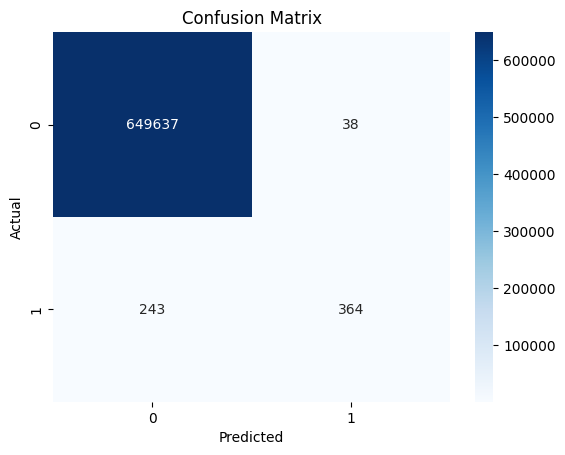

In [43]:
# 4. Demonstrate the performance of the model by using best set of tools

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.2f}")

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Feature Importances:
amount            0.351225
oldbalanceOrg     0.290815
step              0.183803
oldbalanceDest    0.106033
newbalanceOrig    0.039759
type_TRANSFER     0.017919
type_CASH_OUT     0.009162
type_PAYMENT      0.001039
type_DEBIT        0.000245
dtype: float64


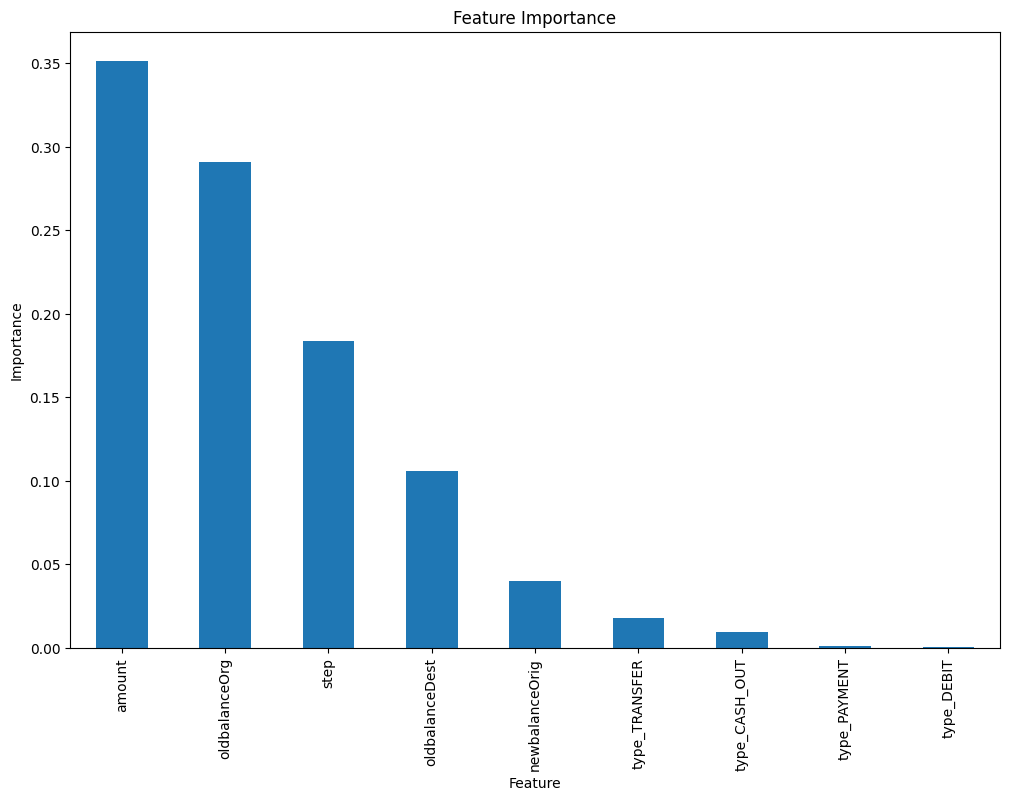

In [44]:
# 5. What are the key factors that predict fraudulent customer?

feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importances:")
print(feature_importance)

# Plot Feature Importance
plt.figure(figsize=(12, 8))
feature_importance.plot(kind='bar')
plt.title('Feature Importance')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.show()

In [45]:
# 6. Do these factors make sense? If yes, How? If not, How not?

top_features = feature_importance.head(5)
print("Top 5 Key Factors Predicting Fraudulent Customer:")
print(top_features)

# Interpretation:
# These factors make sense because they directly relate to the transaction amount and balances, which are key indicators of fraud.

Top 5 Key Factors Predicting Fraudulent Customer:
amount            0.351225
oldbalanceOrg     0.290815
step              0.183803
oldbalanceDest    0.106033
newbalanceOrig    0.039759
dtype: float64


In [46]:
# 7. What kind of prevention should be adopted while company update its infrastructure?

prevention_measures = """
1. Implement multi-factor authentication to enhance security.
2. Monitor real-time transaction patterns to detect anomalies.
3. Set transaction limits to prevent large-scale fraud.
4. Regularly update and patch software to mitigate vulnerabilities.
5. Educate customers about recognizing and reporting fraud.
"""
print(prevention_measures)


1. Implement multi-factor authentication to enhance security.
2. Monitor real-time transaction patterns to detect anomalies.
3. Set transaction limits to prevent large-scale fraud.
4. Regularly update and patch software to mitigate vulnerabilities.
5. Educate customers about recognizing and reporting fraud.



In [47]:
# 8. Assuming these actions have been implemented, how would you determine if they work?

evaluation_strategy = """
1. Monitor fraud detection rates before and after implementing prevention measures.
2. Analyze false positive and false negative rates to evaluate model performance.
3. Conduct regular audits to assess the effectiveness of security protocols.
4. Gather customer feedback regarding security improvements.
5. Adjust and fine-tune the model and prevention strategies based on continuous monitoring and feedback.
"""
print(evaluation_strategy)

# Save the cleaned dataset to a new CSV file
data_final.to_csv('cleaned_fraud_data.csv', index=False)



1. Monitor fraud detection rates before and after implementing prevention measures.
2. Analyze false positive and false negative rates to evaluate model performance.
3. Conduct regular audits to assess the effectiveness of security protocols.
4. Gather customer feedback regarding security improvements.
5. Adjust and fine-tune the model and prevention strategies based on continuous monitoring and feedback.



## CONCLUSION

We have seen that Accuracy of both Random Forest and Decision Tree is equal, although teh precision of Random Forest is more. In a fraud detection model, Precision is highly important because rather than predicting normal transactions correctly we want Fraud transactions to be predicted correctly and Legit to be left off.If either of the 2 reasons are not fulfiiled we may catch the innocent and leave the culprit.
This is also one of the reason why Random Forest and Decision Tree are used unstead of other algorithms.


Also the reason I have chosen this model is because of highly unbalanced dataset (Legit: Fraud :: 99.87:0.13). Random forest makes multiple decision trees which makes it easier (although time taking) for model to understand the data in a simpler way since Decision Tree makes decisions in a boolean way.